<a href="https://www.kaggle.com/mohamedabdullah/beautiful-insights-into-black-friday-data?scriptVersionId=84743159" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Beautiful Insights Into Black Friday Data
![black friday](https://images.pexels.com/photos/5650050/pexels-photo-5650050.jpeg)
<br><br>
Welcome all 👋<br>

In this kernel we will go together into black friday data to discover some insights in it<br>

We will deal with our insights in a form of **question** ➡ **analysis** ➡ **answer** ➡ **decision (if available).** Our Analysis will devided into two ways 👇
* **Exploratory Data Analysis (Numerically)**
* **Exploratory Data Analysis (Graphically)**

First We will import libraries and load data 👇


In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

print("libraries loaded successfully")

libraries loaded successfully


In [2]:
data_train = pd.read_csv('/kaggle/input/black-friday/train.csv')
print("Data loaded successfully")

Data loaded successfully


# 1. Data exploration
Now let's take fast look at our data 👇

In [3]:
#exploar data
print("data shape : ",data_train.shape)
data_train.describe()

data shape :  (550068, 12)


,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [4]:
print("Data columns")
print("--------------------------------------------")
print(pd.DataFrame(data_train.columns))
print("--------------------------------------------")

Data columns
--------------------------------------------
                             0
0                      User_ID
1                   Product_ID
2                       Gender
3                          Age
4                   Occupation
5                City_Category
6   Stay_In_Current_City_Years
7               Marital_Status
8           Product_Category_1
9           Product_Category_2
10          Product_Category_3
11                    Purchase
--------------------------------------------


As we see in above ☝ output some columns not useful for our analysis like **User_ID** and **Product_ID** columns. So we will drop them. 

In [5]:
data_train = data_train.drop(['User_ID','Product_ID'], axis=1)
print("User_ID and Product_ID columns droped successfully")

User_ID and Product_ID columns droped successfully


# 2. Missing data 
Now let's deal with missing data 👇

In [6]:
#get total count of data including missing data
total = data_train.isnull().sum().sort_values(ascending=False)

#get percent of missing data relevant to all data
percent = (data_train.isnull().sum()/data_train.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Product_Category_3,383247,0.696727
Product_Category_2,173638,0.315666
Purchase,0,0.000000
Product_Category_1,0,0.000000
Marital_Status,0,0.000000
Stay_In_Current_City_Years,0,0.000000
City_Category,0,0.000000
Occupation,0,0.000000
Age,0,0.000000
Gender,0,0.000000


### How to Handle Missing Data ? 🙄
One of the most common problems I have faced in Data Cleaning/Exploratory Analysis is handling the missing values.<br>
This is a picture that give us a guide to deal with missingg data 👇 <br>
<img src='https://miro.medium.com/max/1528/1*_RA3mCS30Pr0vUxbp25Yxw.png' width="550px" style='float:left;'>
<div style='clear:both'></div>
<br>
As we see in above picture there are many ways to deal with Missing Data. In this **Kernel** i will use two of them on at each branch.<br><br>
In **Deletion** I will use **Deleting Columns** technique.<br>

Sometimes we can drop variables if the data is missing for more than 60% observations because these variables are useless.

In **Imputation** because our problem is a general problem I will use **simpelImputer** from **SKlearn** library<br>

I will Delete the following Column **Product_Category_3** because missing data in this columns more than **60%** observations.<br>

And impute **Product_Category_2** column because missing data in this columns less than **60%** observations.


In [7]:
data_train = data_train.drop('Product_Category_3', axis=1)
print("Product_Category_3 column droped successfully")

Product_Category_3 column droped successfully


In [8]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(pd.DataFrame(data_train['Product_Category_2']))
data_train['Product_Category_2'] = imputer.transform(pd.DataFrame(data_train['Product_Category_2']))
data_train['Product_Category_2'] = np.round(data_train['Product_Category_2'])

print("Product_Category_2 column imputed successfully")

Product_Category_2 column imputed successfully


**Moment of truth** 😧<br>
Now let's know if our data contain any missing value

In [9]:
#print max count number of null values
print('Number of missing values = ',data_train.isnull().sum().max())

Number of missing values =  0


Now let's get background about our cleaning data 💪 data types 😊

In [10]:
data_train.dtypes

Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                        int64
dtype: object

# 3. Exploratory Data Analysis
Now we will get each column from our columns and make our insights process on it. let's start with **Gender** column 👇.
## Gender 👨👩

**Question 1 :** Are females buying higher value purchases than males ? 

### Exploratory Data Analysis (Numerically) 💰

In [11]:
malesPurchaserData = data_train.loc[data_train['Gender'] == 'M']
malesPurchaseMean = np.mean(malesPurchaserData['Purchase'])
print("Purchase mean for male purchasers = ",malesPurchaseMean)

femalsPurchaserData = data_train.loc[data_train['Gender'] == 'F']
femalsPurchaseMean = np.mean(femalsPurchaserData['Purchase'])
print("Purchase mean for femal purchasers = ",femalsPurchaseMean)

Purchase mean for male purchasers =  9437.526040472265
Purchase mean for femal purchasers =  8734.565765155476


### Exploratory Data Analysis (Graphically) 📈

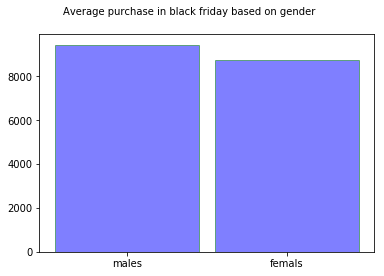

In [12]:
labels=['males','femals']
values = [malesPurchaseMean,femalsPurchaseMean]

plt.bar(labels,values, width=.9, facecolor='b', edgecolor='g', alpha=.5)
plt.text(-0.4,10800,'Average purchase in black friday based on gender')
         
plt.show()

**Answer :** No, males buying higher value purchases than females ? But the difference not large.
<hr>

**Question 2 :** Are males buyers more than females buyers ?

### Exploratory Data Analysis (Numerically) 💰

In [13]:
print('Number of males purchaser = ',malesPurchaserData.shape[0])
print('Number of femals purchaser = ',femalsPurchaserData.shape[0])

Number of males purchaser =  414259
Number of femals purchaser =  135809


### Exploratory Data Analysis (Graphically) 📈

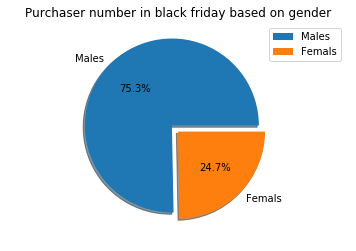

In [14]:
genderCountData = [malesPurchaserData.shape[0],femalsPurchaserData.shape[0]]
labels=['Males','Femals']
plt.axis('equal')

plt.pie(genderCountData, labels=labels,
              explode=[0.1,0],
              autopct='%1.1f%%',
              shadow=True,
              startangle=0,
              labeldistance=1.1,
              pctdistance=.6)

plt.legend(labels)
plt.title('Purchaser number in black friday based on gender')
plt.show()

**Answer :** Yes males buyers more than females buyers. Significantly.<br><br>
**Decision :** We must take care of males than females in the next marketing campaigns. where the ratio is 75 to 25 percent respectively.<hr>
Now let's deal with **Occupation** column 👇.
## Occupation 💼
Occupation column is a numerical column has unique values from 0 to 20. I don't know the meaning of these values, But let's show it 😊.

In [15]:
list(data_train['Occupation'].sort_values().unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

**Question 3 :** Are purchase value clear vary based on occupation value ?
### Exploratory Data Analysis (Numerically) 💰

In [16]:
labels = []
values = []

for uniqueOccupationValue in data_train['Occupation'].sort_values().unique():
    OccPurchaserData = data_train.loc[data_train['Occupation'] == uniqueOccupationValue]
    OccPurchaserMean = np.mean(OccPurchaserData['Purchase'])
    labels.append(uniqueOccupationValue)
    values.append(OccPurchaserMean)
    
    print("When occupation = ",uniqueOccupationValue," mean purchase value = ",OccPurchaserMean)
    print("------------------------------------------------------------")


When occupation =  0  mean purchase value =  9124.428587839973
------------------------------------------------------------
When occupation =  1  mean purchase value =  8953.193269514612
------------------------------------------------------------
When occupation =  2  mean purchase value =  8952.481683466225
------------------------------------------------------------
When occupation =  3  mean purchase value =  9178.593087818697
------------------------------------------------------------
When occupation =  4  mean purchase value =  9213.980251147868
------------------------------------------------------------
When occupation =  5  mean purchase value =  9333.149297856615
------------------------------------------------------------
When occupation =  6  mean purchase value =  9256.535691476296
------------------------------------------------------------
When occupation =  7  mean purchase value =  9425.728222819745
------------------------------------------------------------
When occ

### Exploratory Data Analysis (Graphically) 📈

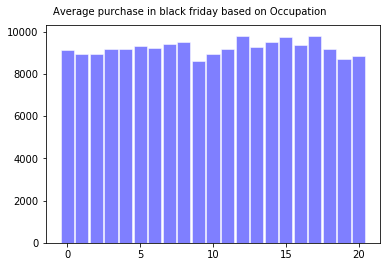

In [17]:
plt.bar(labels,values, width=.9, facecolor='b', edgecolor='w', alpha=.5)
plt.text(-1,10800,'Average purchase in black friday based on Occupation')
         
plt.show()

**Answer :** Purchase value don't effect with occupation value. Because mean values of purchase at each occupation value nearest to each other.

<hr>
Now let's deal with **City_Category** column 👇.
## City_Category 🏡
City_Category column is categorical column has unique values **A, B,** and **C**. I don't know the meaning of these values, But I guess that category **A** best than category **B** and category **B** best than category **C** according to city level. But let's show it 😊.

In [18]:
list(data_train['City_Category'].sort_values().unique())

['A', 'B', 'C']

**Question 4 :** Are purchase value clear vary based on City Category ?
### Exploratory Data Analysis (Numerically) 💰

In [19]:
labels = []
values = []
cityCatCount = []

for uniqueCityCategoryValue in data_train['City_Category'].sort_values().unique():
    CityCatPurchaserData = data_train.loc[data_train['City_Category'] == uniqueCityCategoryValue]
    CityCatPurchaserMean = np.mean(CityCatPurchaserData['Purchase'])
    labels.append(uniqueCityCategoryValue)
    values.append(CityCatPurchaserMean)
    cityCatCount.append(CityCatPurchaserData.shape[0])
    
    print("When City_Category = ",uniqueCityCategoryValue," mean Purchase value = ",CityCatPurchaserMean)
    print("------------------------------------------------------------------------------------------")


When City_Category =  A  mean Purchase value =  8911.939216084484
------------------------------------------------------------------------------------------
When City_Category =  B  mean Purchase value =  9151.300562781986
------------------------------------------------------------------------------------------
When City_Category =  C  mean Purchase value =  9719.92099313568
------------------------------------------------------------------------------------------


### Exploratory Data Analysis (Graphically) 📈

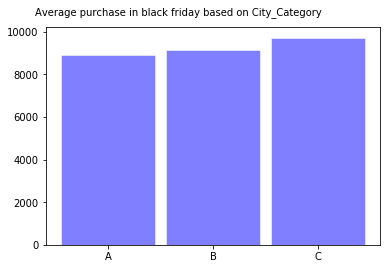

In [20]:
plt.bar(labels,values, width=.9, facecolor='b', edgecolor='w', alpha=.5)
plt.text(-0.7,10800,'Average purchase in black friday based on City_Category')
         
plt.show()

**Answer :** Purchase value doesn't big vary from one category to another. But we can say that people who live in city of category C purchase more than other peoples who live cities of category  A or B.

<hr>

According to above ☝ info<br>
**Question 5 :** can we consider that Purchasers who live in city of category C more than other Purchasers who live cities of category  A or B ?

### Exploratory Data Analysis (Numerically) 💰

In [21]:
for uniqueCityCategoryValue in data_train['City_Category'].sort_values().unique():
    CityCatPurchaserData = data_train.loc[data_train['City_Category'] == uniqueCityCategoryValue]
    print("Purchasers count who live in city of category ",uniqueCityCategoryValue," = ",CityCatPurchaserData.shape[0])
    print("------------------------------------------------------------------------------------------")

Purchasers count who live in city of category  A  =  147720
------------------------------------------------------------------------------------------
Purchasers count who live in city of category  B  =  231173
------------------------------------------------------------------------------------------
Purchasers count who live in city of category  C  =  171175
------------------------------------------------------------------------------------------


### Exploratory Data Analysis (Graphically) 📈

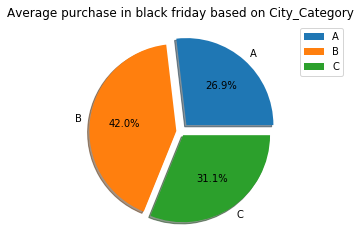

In [22]:
values = cityCatCount
labels = ['A', 'B', 'C']
plt.axis('equal')

plt.pie(values, labels=labels,
              explode=[0.1,0.05,0.05],
              autopct='%1.1f%%',
              shadow=True,
              startangle=0,
              labeldistance=1.1,
              pctdistance=.6)

plt.legend(labels)
plt.title('Average purchase in black friday based on City_Category')
plt.show()

**Answer :** No. Because Purchasers who live in city of category B has largest number of Purchasers than A and C.
<hr>
Now let's deal with Stay_In_Current_City_Years column 👇.
## Stay_In_Current_City_Years 🌔
Stay_In_Current_City_Years is a categorical column has unique values, **'0'**, **'1'**, **'2'**, and **'4+'**. It represent number of years a purchaser stay in a city.<br>Let's show it 😊.

In [23]:
list(data_train['Stay_In_Current_City_Years'].sort_values().unique())

['0', '1', '2', '3', '4+']

Now we will convert **'4+'** value to 4 to can convert **Stay_In_Current_City_Years** column from string to int. 👇

In [24]:
data_train.loc[data_train['Stay_In_Current_City_Years'] == '4+','Stay_In_Current_City_Years'] = '4'
data_train['Stay_In_Current_City_Years'] = pd.to_numeric(data_train['Stay_In_Current_City_Years'])
print("Stay_In_Current_City_Years converted to int successfully")

Stay_In_Current_City_Years converted to int successfully


**Question 6 :** Are people who stay more years buy less than people who stay less ? 

## Exploratory Data Analysis (Numerically) 💰

In [25]:
labels = []
values = []
yearsCountData = []

for uniqueYearsValue in data_train['Stay_In_Current_City_Years'].sort_values().unique():
    CityYearsPurchaserData = data_train.loc[data_train['Stay_In_Current_City_Years'] == uniqueYearsValue]
    CityYearsPurchaserMean = np.mean(CityYearsPurchaserData['Purchase'])
    labels.append(uniqueYearsValue)
    values.append(CityYearsPurchaserMean)
    yearsCountData.append(CityYearsPurchaserData.shape[0])
    
    if uniqueYearsValue != 4:
        print("Mean purchase of people who stay ",uniqueYearsValue," years = ",CityYearsPurchaserMean)
    elif uniqueYearsValue == 4:
        print("Mean purchase of people who stay more than ",uniqueYearsValue," years = ",CityYearsPurchaserMean)



Mean purchase of people who stay  0  years =  9180.075122987177
Mean purchase of people who stay  1  years =  9250.145923300364
Mean purchase of people who stay  2  years =  9320.429810090536
Mean purchase of people who stay  3  years =  9286.904119221284
Mean purchase of people who stay more than  4  years =  9275.59887165687


## Exploratory Data Analysis (Graphically) 📈

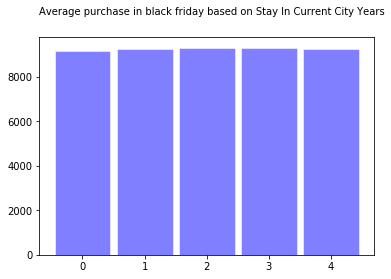

In [26]:
plt.bar(labels,values, width=.9, facecolor='b', edgecolor='w', alpha=.5)
plt.text(-0.7,10800,'Average purchase in black friday based on Stay In Current City Years')
         
plt.show()

**Answer:** No. Because the mean purchases of people despite the varying years of stay very close
<hr>
**Question 7 :** Do people who stay longer in city have more action towards buying ?

## Exploratory Data Analysis (Numerically) 💰

In [27]:
for uniqueYearsValue in data_train['Stay_In_Current_City_Years'].sort_values().unique():
    CityYearsPurchaserData = data_train.loc[data_train['Stay_In_Current_City_Years'] == uniqueYearsValue]
    if uniqueYearsValue != 4:
        print("Number of purchasers who stay ",uniqueYearsValue," years = ",CityYearsPurchaserData.shape[0])
    elif uniqueYearsValue == 4:
        print("Number of purchasers who stay more than ",uniqueYearsValue," years = ",CityYearsPurchaserData.shape[0])

    

Number of purchasers who stay  0  years =  74398
Number of purchasers who stay  1  years =  193821
Number of purchasers who stay  2  years =  101838
Number of purchasers who stay  3  years =  95285
Number of purchasers who stay more than  4  years =  84726


## Exploratory Data Analysis (Graphically) 📈

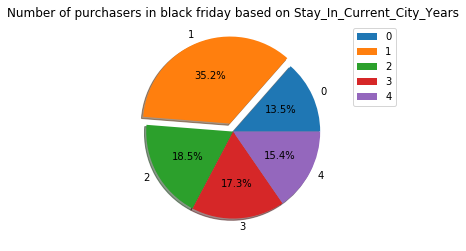

In [28]:
values = yearsCountData
labels = list(data_train['Stay_In_Current_City_Years'].sort_values().unique())
plt.axis('equal')

plt.pie(values, labels=labels,
              explode=[0,0.1,0,0,0],
              autopct='%1.1f%%',
              shadow=True,
              startangle=0,
              labeldistance=1.1,
              pctdistance=.6)

plt.legend(labels)
plt.title('Number of purchasers in black friday based on Stay_In_Current_City_Years')
plt.show()

**Answer :** No. Because people who stay longer in city have less action towards buying than others.
**Decision :** We must take care of people who stay in range 1 year in city because they have more action towards buying than others.
<hr>
## Marital_Status 🚩
Marital_Status is a numerical column has two value **0** and **1**. This column describe if purchaser married or not. Let's show it 😊

In [29]:
list(data_train['Marital_Status'].unique())

[0, 1]

**Question 8 :** Are people who married buy more than else ?
## Exploratory Data Analysis (Numerically) 💰

In [30]:
labels = []
values = []
maritalStatusCount = []

for maritalStatusValue in data_train['Marital_Status'].unique():
    maritalStatusPurchaserData = data_train.loc[data_train['Marital_Status'] == maritalStatusValue]
    maritalStatusPurchaserMean = np.mean(maritalStatusPurchaserData['Purchase'])
    labels.append(maritalStatusValue)
    values.append(maritalStatusPurchaserMean)
    maritalStatusCount.append(maritalStatusPurchaserData.shape[0])
    
    print("Mean purchase of people who marital Status is ",maritalStatusValue," = ",maritalStatusPurchaserMean)

Mean purchase of people who marital Status is  0  =  9265.907618921507
Mean purchase of people who marital Status is  1  =  9261.174574082374


## Exploratory Data Analysis (Graphically) 📈

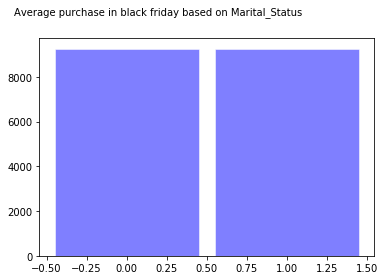

In [31]:
plt.bar(labels,values, width=.9, facecolor='b', edgecolor='w', alpha=.5)
plt.text(-0.7,10800,'Average purchase in black friday based on Marital_Status')
         
plt.show()

**Answer :** No. Because purchasers who married or not, have almost same average of purchase.
<hr>
**Question 8 :** Do people who married have more action towards buying ?

## Exploratory Data Analysis (Numerically) 💰

In [32]:
for maritalStatusValue in data_train['Marital_Status'].unique():
    maritalStatusPurchaserData = data_train.loc[data_train['Marital_Status'] == maritalStatusValue]
    print("Number of purchasers who marital status is ",maritalStatusValue," = ",maritalStatusPurchaserData.shape[0])

Number of purchasers who marital status is  0  =  324731
Number of purchasers who marital status is  1  =  225337


## Exploratory Data Analysis (Graphically) 📈

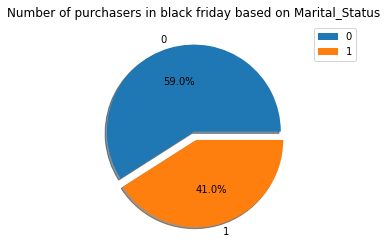

In [33]:
values = maritalStatusCount
labels = list(data_train['Marital_Status'].unique())
plt.axis('equal')

plt.pie(values, labels=labels,
              explode=[0,0.1],
              autopct='%1.1f%%',
              shadow=True,
              startangle=0,
              labeldistance=1.1,
              pctdistance=.6)

plt.legend(labels)
plt.title('Number of purchasers in black friday based on Marital_Status')
plt.show()

**Answer :** Yes. Because 59% of purchasers are married.<br>
**Decision :** We must take care of married than singles in the next marketing campaigns. where the ratio is 59 to 41 percent respectively.
<hr>
**Question 9 :** Are Profit from product of category 1 more or from product of category 2 ?  
## Exploratory Data Analysis (Numerically) 💰


In [34]:
Product_Category_1_sum = data_train['Product_Category_1'].sum()
Product_Category_2_sum = data_train['Product_Category_2'].sum()

print("Profit from product of category 1 = ",Product_Category_1_sum)
print("Profit from product of category 2 = ",Product_Category_2_sum)

Profit from product of category 1 =  2972716
Profit from product of category 2 =  5441328.0


## Exploratory Data Analysis (Graphically) 📈

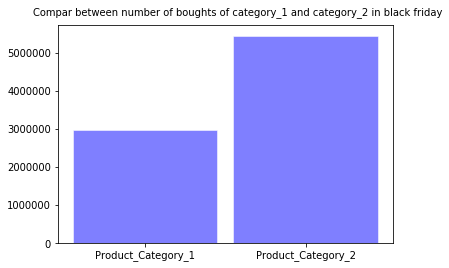

In [35]:
labels = ['Product_Category_1','Product_Category_2']
values = [Product_Category_1_sum,Product_Category_2_sum]

plt.bar(labels,values, width=.9, facecolor='b', edgecolor='w', alpha=.5)
plt.text(-0.7,6000000,'Compar between number of boughts of category_1 and category_2 in black friday')
         
plt.show()

**Answer :** Profit from product of category 2 more than product of category 1.<br>
**Decision :** We must take care of product of category 2 in the next marketing campaigns
<hr>
**At the end, I would like this kernel to be helpful for us. and any suggestions to improve this kernel will be much appreciated.**<br>

**Good luck. 👍**